<a href="https://colab.research.google.com/github/morteza-nouri/AI-TensorFlow/blob/main/AI_CA5_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Intelligence - Computer Assignment 5 - Phase 2**

> **Morteza Nouri, 810198481**

## __Gloals:__

## __Description:__

## **Part 1: Preprocess**



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp "/content/drive/MyDrive/A_Z Handwritten Data.csv" .

In [5]:
import pandas as pd


df = pd.read_csv('A_Z Handwritten Data.csv')

The original data type of columns was int64 which consumed much memory, I change the columns type to unsigned 8 bit integer to lower the memory usage. <br>
(_*Note: unit8 is sufficient to represent the data in our dataset._)

In [9]:
df = df.astype("uint8")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: uint8(785)
memory usage: 278.8 MB


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# check for missing values in dataframe

df.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [13]:
# function to get corresponding alphabet.(A-Z mapped to 0-25 in order in dataset)

def getAlphabet(n):
  return chr(n + 65)


In [14]:
import numpy as np

# construct labels
labels = df['0'].apply(getAlphabet)

# construct pixel data and reshape them to be 28*28
data = df.iloc[:,1:].values
data = data.reshape(-1, 28, 28)

working_df = pd.DataFrame({'Label': labels, 'data': [*data]})
working_df

,Label,data
0,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...
372445,Z,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
372446,Z,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
372447,Z,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
372448,Z,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


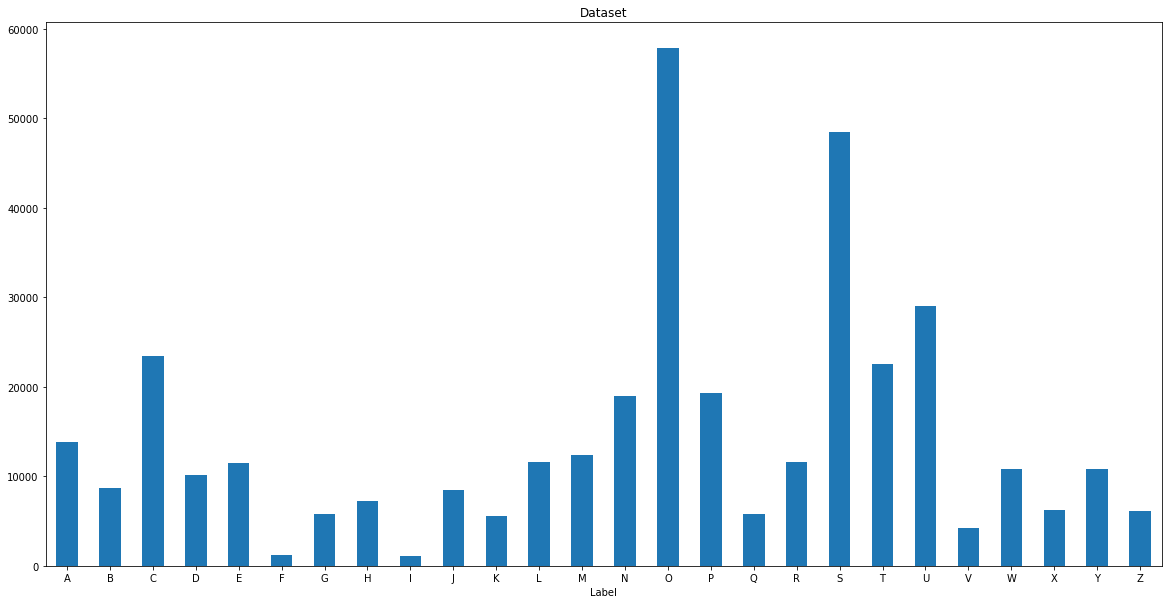

In [15]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
working_df.groupby('Label').size().plot(kind='bar', title='Dataset')
plt.xticks(rotation='horizontal')
plt.show()



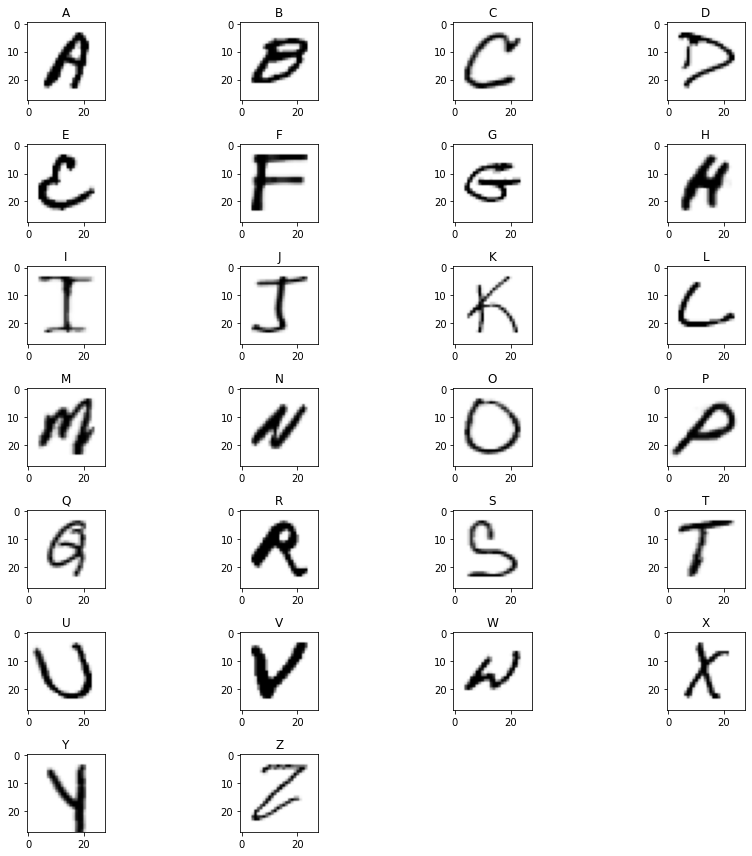

In [16]:
plt.figure(figsize=(12,12))
i = 0
for label, row in working_df.groupby('Label').first().iterrows():
    plt.subplot(7, 4, i + 1)
    plt.imshow(row['data'], cmap='Greys')
    plt.title(label)
    i += 1

plt.tight_layout()
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(working_df, test_size=0.2)


In [52]:
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()

train_labels = oneHotEncoder.fit_transform(train[['Label']]).toarray()
test_labels = oneHotEncoder.fit_transform(test[['Label']]).toarray()

print("New shape of train labels:", train_labels.shape)
print("New shape of test labels:", test_labels.shape)


New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [67]:
train_data = np.stack(train['data'].div(255)).reshape(-1, 28, 28, 1)
test_data = np.stack(test['data'].div(255)).reshape(-1, 28, 28, 1)

print("New shape of train data:", train_data.shape)
print("New shape of test labels:", test_data.shape)


New shape of train data: (297960, 28, 28, 1)
New shape of test labels: (74490, 28, 28, 1)


## **Part 2: Designing Neural Network**

In [80]:
from tensorflow import keras

input = keras.layers.Input(shape=(28, 28, 1))

output = keras.layers.Flatten()(input)
output = keras.layers.Dense(128, activation='relu')(output)
output = keras.layers.Dense(32, activation='relu')(output)
output = keras.layers.Dense(64, activation='relu')(output)
output = keras.layers.Dense(26, activation='softmax')(output)

main_model = keras.models.Model(inputs=input, outputs=output)
main_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
main_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                                 
 dense_20 (Dense)            (None, 64)                2112      
                                                                 
 dense_21 (Dense)            (None, 26)                1690      
                                                                 
Total params: 108,410
Trainable params: 108,410
Non-trainab

In [82]:
main_history = main_model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=10)

Epoch 1/10
9312/9312 [==============================] - 26s 3ms/step - loss: 0.6549 - accuracy: 0.8202 - val_loss: 0.3482 - val_accuracy: 0.9028
Epoch 2/10
9312/9312 [==============================] - 23s 3ms/step - loss: 0.2612 - accuracy: 0.9287 - val_loss: 0.2134 - val_accuracy: 0.9423
Epoch 3/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.1901 - accuracy: 0.9482 - val_loss: 0.2035 - val_accuracy: 0.9428
Epoch 4/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.1566 - accuracy: 0.9573 - val_loss: 0.1511 - val_accuracy: 0.9585
Epoch 5/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.1355 - accuracy: 0.9629 - val_loss: 0.1335 - val_accuracy: 0.9631
Epoch 6/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.1204 - accuracy: 0.9668 - val_loss: 0.2266 - val_accuracy: 0.9313
Epoch 7/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.1082 - accuracy: 0.9700 - val_loss: 0.1153 - val_ac